# 特征构造

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False  ## 解决坐标轴刻度负号乱码
plt.rcParams['font.sans-serif'] = ['Simhei']  # 设置中文显示，KaiTi，FangSong

## 时间特征构造

### 持续时间

In [3]:
time_list = [['2019-01-01 01:22:26', '2019-02-02 04:34:52', '2019-03-03 06:16:40',
    '2019-04-04 08:11:38', '2019-05-05 10:52:39', '2019-06-06 12:06:25'],
    ['2019-07-07 14:05:25', '2019-08-08 16:51:33', '2019-09-09 18:28:28',
    '2019-10-10 20:55:12', '2019-11-11 22:55:12', '2019-12-12 00:55:12']]
df = pd.DataFrame(time_list).T
df.columns=['t1','t2']
df

,t1,t2
0,2019-01-01 01:22:26,2019-07-07 14:05:25
1,2019-02-02 04:34:52,2019-08-08 16:51:33
2,2019-03-03 06:16:40,2019-09-09 18:28:28
3,2019-04-04 08:11:38,2019-10-10 20:55:12
4,2019-05-05 10:52:39,2019-11-11 22:55:12
5,2019-06-06 12:06:25,2019-12-12 00:55:12


In [5]:
df['t1']=pd.to_datetime(df['t1'])
df['t2']=pd.to_datetime(df['t2'])

In [6]:
df['持续时间']=df['t2']-df['t1']

In [7]:
df['持续时间'].apply(lambda x:pd.Timedelta(x).days+pd.Timedelta(x).seconds/3600/24)

0    187.529850
1    187.511586
2    190.508194
3    189.530255
4    190.501771
5    188.533877
Name: 持续时间, dtype: float64

### 时间特征拆解

In [8]:
date_time_str_list = [
    '2019-01-01 01:22:26', '2019-02-02 04:34:52', '2019-03-03 06:16:40',
    '2019-04-04 08:11:38', '2019-05-05 10:52:39', '2019-06-06 12:06:25',
    '2019-07-07 14:05:25', '2019-08-08 16:51:33', '2019-09-09 18:28:28',
    '2019-10-10 20:55:12', '2019-11-11 22:55:12', '2019-12-12 00:55:12',
]
df = pd.DataFrame({'时间': date_time_str_list})
df['时间'] = pd.to_datetime(df['时间'])
df

,时间
0,2019-01-01 01:22:26
1,2019-02-02 04:34:52
2,2019-03-03 06:16:40
3,2019-04-04 08:11:38
4,2019-05-05 10:52:39
5,2019-06-06 12:06:25
6,2019-07-07 14:05:25
7,2019-08-08 16:51:33
8,2019-09-09 18:28:28
9,2019-10-10 20:55:12


In [9]:
# 年份
df['年']=df['时间'].dt.year
 
# 月份
df['月']=df['时间'].apply(lambda x: x.month)
 
# 日 一个月的第几天
df['日']=df['时间'].apply(lambda x: x.day)
 
# 小时  一天的第几个小时
df['时']=df['时间'].apply(lambda x: x.hour)
 
# 分钟  一个小时的第几分钟
df['分']=df['时间'].apply(lambda x: x.minute)
 
# 秒数   一个分钟内的秒数
df['秒']=df['时间'].apply(lambda x: x.second)
 
# 一天中的第几分钟
df['一天中的第几分钟']=df['时间'].apply(lambda x: x.minute + x.hour*60)
 
# 星期几，一周的第几天
df['星期几']=df['时间'].apply(lambda x: x.dayofweek+1)
 
# 一年中的第几天
df['一年中的第几天']=df['时间'].apply(lambda x: x.dayofyear)
 
# 一年中的第几周
df['一年中的第几周']=df['时间'].apply(lambda x: x.week)
 
#季度
df['一年中的第几个季度']=df['时间'].dt.quarter  
    
    
# 一天中哪个时间段：凌晨、早晨、上午、中午、下午、傍晚、晚上、深夜；
period_dict ={
    23: '深夜', 0: '深夜', 1: '深夜',
    2: '凌晨', 3: '凌晨', 4: '凌晨',
    5: '早晨', 6: '早晨', 7: '早晨',
    8: '上午', 9: '上午', 10: '上午', 11: '上午',
    12: '中午', 13: '中午',
    14: '下午', 15: '下午', 16: '下午', 17: '下午',
    18: '傍晚',
    19: '晚上', 20: '晚上', 21: '晚上', 22: '晚上',
}
df['时间段']=df['时'].map(period_dict)
 
# 自定义季度
season_dict = {
    1: '春季', 2: '春季', 3: '春季',
    4: '夏季', 5: '夏季', 6: '夏季',
    7: '秋季', 8: '秋季', 9: '秋季',
    10: '冬季', 11: '冬季', 12: '冬季',
}
df['季节']=df['月'].map(season_dict)

In [10]:
df

,时间,年,月,日,时,分,秒,一天中的第几分钟,星期几,一年中的第几天,一年中的第几周,一年中的第几个季度,时间段,季节
0,2019-01-01 01:22:26,2019,1,1,1,22,26,82,2,1,1,1,深夜,春季
1,2019-02-02 04:34:52,2019,2,2,4,34,52,274,6,33,5,1,凌晨,春季
2,2019-03-03 06:16:40,2019,3,3,6,16,40,376,7,62,9,1,早晨,春季
3,2019-04-04 08:11:38,2019,4,4,8,11,38,491,4,94,14,2,上午,夏季
4,2019-05-05 10:52:39,2019,5,5,10,52,39,652,7,125,18,2,上午,夏季
5,2019-06-06 12:06:25,2019,6,6,12,6,25,726,4,157,23,2,中午,夏季
6,2019-07-07 14:05:25,2019,7,7,14,5,25,845,7,188,27,3,下午,秋季
7,2019-08-08 16:51:33,2019,8,8,16,51,33,1011,4,220,32,3,下午,秋季
8,2019-09-09 18:28:28,2019,9,9,18,28,28,1108,1,252,37,3,傍晚,秋季
9,2019-10-10 20:55:12,2019,10,10,20,55,12,1255,4,283,41,4,晚上,冬季


### 时间特征判断

In [12]:
date_time_str_list = [
    '2010-01-01 01:22:26', '2011-02-03 04:34:52', '2012-03-05 06:16:40',
    '2013-04-07 08:11:38', '2014-05-09 10:52:39', '2015-06-11 12:06:25',
    '2016-07-13 14:05:25', '2017-08-15 16:51:33', '2018-09-17 18:28:28',
    '2019-10-07 20:55:12', '2020-11-23 22:55:12', '2021-12-25 00:55:12',
    '2022-12-27 02:55:12', '2023-12-29 03:55:12', '2024-12-31 05:55:12',
]
df = pd.DataFrame({'时间': date_time_str_list})
df['时间'] = df['时间'].apply(lambda x: pd.Timestamp(x))
df

,时间
0,2010-01-01 01:22:26
1,2011-02-03 04:34:52
2,2012-03-05 06:16:40
3,2013-04-07 08:11:38
4,2014-05-09 10:52:39
5,2015-06-11 12:06:25
6,2016-07-13 14:05:25
7,2017-08-15 16:51:33
8,2018-09-17 18:28:28
9,2019-10-07 20:55:12


In [13]:
# 是否闰年
df['是否闰年'] = df['时间'].dt.is_leap_year

# 是否月初，是否是一个月的第一天
df['是否月初'] = df['时间'].apply(lambda x: x.is_month_start)
 
# 是否月末，是否是一个月的最后一天
df['是否月末'] = df['时间'].apply(lambda x: x.is_month_end)
 
# 是否季节初
df['是否季节初'] = df['时间'].apply(lambda x: x.is_quarter_start)
 
# 是否季节末
df['是否季节末'] = df['时间'].apply(lambda x: x.is_quarter_end)
 
# 是否年初  每年的第一天
df['是否年初'] = df['时间'].apply(lambda x: x.is_year_start)
   
# 是否年尾   每年的最后一天
df['是否年尾'] = df['时间'].apply(lambda x: x.is_year_end)
 
# 是否周末
df['是否周末'] = df['时间'].apply(lambda x: True if x.dayofweek in [5, 6] else False)
 
# 是否公共假期
public_vacation_list = [
    '20190101', '20190102', '20190204', '20190205', '20190206',
    '20190207', '20190208', '20190209', '20190210', '20190405',
    '20190406', '20190407', '20190501', '20190502', '20190503',
    '20190504', '20190607', '20190608', '20190609', '20190913',
    '20190914', '20190915', '20191001', '20191002', '20191003',
    '20191004', '20191005', '20191006', '20191007',
] # 此处未罗列所有公共假期
df['日期'] = df['时间'].apply(lambda x: x.strftime('%Y%m%d'))
df['是否公共假期'] = df['日期'].apply(lambda x: True if x in public_vacation_list else False)
 
# 是否营业时间
df['是否营业时间'] = False
df['小时']=df['时间'].apply(lambda x: x.hour)
df.loc[((df['小时'] >= 8) & (df['小时'] < 22)), '是否营业时间'] = True
 
df.drop(['日期', '小时'], axis=1, inplace=True)

In [14]:
df

,时间,是否闰年,是否月初,是否月末,是否季节初,是否季节末,是否年初,是否年尾,是否周末,是否公共假期,是否营业时间
0,2010-01-01 01:22:26,False,True,False,True,False,True,False,False,False,False
1,2011-02-03 04:34:52,False,False,False,False,False,False,False,False,False,False
2,2012-03-05 06:16:40,True,False,False,False,False,False,False,False,False,False
3,2013-04-07 08:11:38,False,False,False,False,False,False,False,True,False,True
4,2014-05-09 10:52:39,False,False,False,False,False,False,False,False,False,True
5,2015-06-11 12:06:25,False,False,False,False,False,False,False,False,False,True
6,2016-07-13 14:05:25,True,False,False,False,False,False,False,False,False,True
7,2017-08-15 16:51:33,False,False,False,False,False,False,False,False,False,True
8,2018-09-17 18:28:28,False,False,False,False,False,False,False,False,False,True
9,2019-10-07 20:55:12,False,False,False,False,False,False,False,False,True,True


## 时间序列特征构造

In [16]:
# 加载洗发水销售数据集，每个月的
df = pd.read_csv('shampoo-sales.csv')
df 

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


### 时间序列聚合特征

In [17]:
# 平均值
mean_v = df['Sales'].mean()
print('mean: {}'.format(mean_v))
 
# 最小值
min_v = df['Sales'].min()
print('min: {}'.format(min_v))
 
# 最大值
max_v = df['Sales'].max()
print('max: {}'.format(max_v))
 
# 扩散值：标准差
std_v = df['Sales'].std()
print('std: {}'.format(std_v))
 
# 扩散值：平均绝对偏差
mad_v = df['Sales'].mad()
print('mad: {}'.format(mad_v))
 
# 扩散值：四分位差
q1 = df['Sales'].quantile(q=0.25)  #下四分位
q3 = df['Sales'].quantile(q=0.75)  #上四分位
irq = q3 - q1  #四分位距
print('q1={}, q3={}, irq={}'.format(q1, q3, irq))
 
# 离散系数
variation_v = std_v/mean_v
print('variation: {}'.format(variation_v))
 
# 分布性：偏态系数
skew_v = df['Sales'].skew()
print('skew: {}'.format(skew_v))
# 分布性：峰态系数
kurt_v = df['Sales'].kurt()
print('kurt: {}'.format(kurt_v))

mean: 312.59999999999997
min: 119.3
max: 682.0
std: 148.93716412347473
mad: 119.66666666666667
q1=192.45000000000002, q3=411.1, irq=218.65
variation: 0.47644646232717447
skew: 0.8945388528534595
kurt: 0.11622821118738624


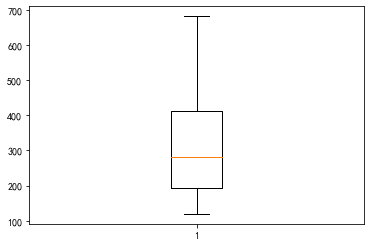

In [18]:
plt.boxplot(df['Sales'],whis = 1.5);

### 时间序列历史特征

In [19]:
# 加载洗发水销售数据集
df = pd.read_csv('shampoo-sales.csv')
 
df['-1day'] = df['Sales'].shift(1)
df['-2day'] = df['Sales'].shift(2)
df['-3day'] = df['Sales'].shift(3)
 
df['-1period'] = df['Sales'].shift(1*12)
df['-2period'] = df['Sales'].shift(2*12)
df

,Month,Sales,-1day,-2day,-3day,-1period,-2period
0,1-01,266.0,NaN,NaN,NaN,NaN,NaN
1,1-02,145.9,266.0,NaN,NaN,NaN,NaN
2,1-03,183.1,145.9,266.0,NaN,NaN,NaN
3,1-04,119.3,183.1,145.9,266.0,NaN,NaN
4,1-05,180.3,119.3,183.1,145.9,NaN,NaN
5,1-06,168.5,180.3,119.3,183.1,NaN,NaN
6,1-07,231.8,168.5,180.3,119.3,NaN,NaN
7,1-08,224.5,231.8,168.5,180.3,NaN,NaN
8,1-09,192.8,224.5,231.8,168.5,NaN,NaN
9,1-10,122.9,192.8,224.5,231.8,NaN,NaN


### 时间序列趋势特征

#### 趋势特征

In [63]:
df = pd.read_csv('shampoo-sales.csv')
df['last 3 day mean'] = (df['Sales'].shift(1) + df['Sales'].shift(2) + df['Sales'].shift(3))/3
df['最近3天趋势'] = df['Sales'].shift(1)/df['last 3 day mean']
df

,Month,Sales,last 3 day mean,最近3天趋势
0,1-01,266.0,NaN,NaN
1,1-02,145.9,NaN,NaN
2,1-03,183.1,NaN,NaN
3,1-04,119.3,198.333333,0.923193
4,1-05,180.3,149.433333,0.798349
5,1-06,168.5,160.900000,1.120572
6,1-07,231.8,156.033333,1.079897
7,1-08,224.5,193.533333,1.197726
8,1-09,192.8,208.266667,1.077945
9,1-10,122.9,216.366667,0.891080


In [64]:
df1=df.fillna(0)
df1

,Month,Sales,last 3 day mean,最近3天趋势
0,1-01,266.0,0.000000,0.000000
1,1-02,145.9,0.000000,0.000000
2,1-03,183.1,0.000000,0.000000
3,1-04,119.3,198.333333,0.923193
4,1-05,180.3,149.433333,0.798349
5,1-06,168.5,160.900000,1.120572
6,1-07,231.8,156.033333,1.079897
7,1-08,224.5,193.533333,1.197726
8,1-09,192.8,208.266667,1.077945
9,1-10,122.9,216.366667,0.891080


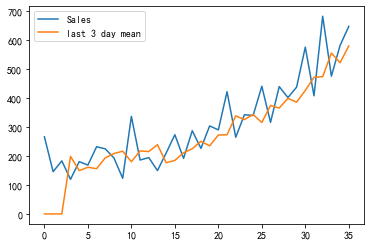

In [66]:
df1[['Sales','last 3 day mean']].plot(); #产生平滑效果

#### 窗口差异值特征

In [67]:
df = pd.read_csv('shampoo-sales.csv')
df['最近两月销量差异值'] = df['Sales'].shift(1) - df['Sales'].shift(2)
df

,Month,Sales,最近两月销量差异值
0,1-01,266.0,NaN
1,1-02,145.9,NaN
2,1-03,183.1,-120.1
3,1-04,119.3,37.2
4,1-05,180.3,-63.8
5,1-06,168.5,61.0
6,1-07,231.8,-11.8
7,1-08,224.5,63.3
8,1-09,192.8,-7.3
9,1-10,122.9,-31.7


#### 自相关特征

In [69]:
df = pd.read_csv('shampoo-sales.csv')
df


,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [169]:
print('滞后数为1的自相关系数：{}'.format(df['Sales'].autocorr(1)))
print('滞后数为2的自相关系数：{}'.format(df['Sales'].autocorr(2)))

滞后数为1的自相关系数：0.7194822398024306
滞后数为2的自相关系数：0.8507433352850972


## 用户行为特征构造

In [21]:
data = pd.read_csv('air_data.csv') #读取原始数据
data.head(2)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33


In [22]:
# 过滤掉票价为空的记录，两年都不为空的数据
data = data[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull()]

# 选出有乘机记录的乘客选出来，乘坐过飞机的客户，三类
#1、要么第一年的总票价不为0
#2、要么第二年的总票价不为0
#3、积累的里程为0，同时折扣率也为0，积分兑换用户
index1 = data['SUM_YR_1'] != 0  #第一年不等于零 选出
index2 = data['SUM_YR_2'] != 0  #第二年不等于零  选出
index3 = (data['SEG_KM_SUM'] == 0) & (data['avg_discount'] == 0)  # 积分兑换用户 
data = data[index1 | index2 | index3] # 逻辑或  用户的筛选


In [ ]:
# LOAD_TIME：数据截取时间（观察期的结束时间，这里为2014-2-31）
# FFP_DATE：入会时间              —— L
# LAST_TO_END：最后一次乘机时间   —— R
# FLIGHT_COUNT：飞行次数  —— F
# SEG_KM_SUM：飞行总里程  —— M
# avg_discount ：平均折扣率 —— C

构造LRFMC指标：

L=LOAD_TIME - FFP_DATE(观测窗口的结束时间 - 入会时间)  # 入会时长，时间间隔
R=LAST_TO_END(最后一次乘坐飞机距观测窗口结束的时长)    #时间间隔
F=FLIGHT_COUNT(观测窗口内的飞行次数)
M=SEG_KM_SUM(观测窗口内的总飞行里程)
C=AVG_DISCOUNT(平均折扣率)

In [23]:
data = data[['LOAD_TIME','FFP_DATE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
data.head(2)

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314


In [24]:
L = pd.to_datetime(data['LOAD_TIME'])- pd.to_datetime(data['FFP_DATE']) 
data['L'] = L.apply(lambda x:x.days/30)
data['R'] = data['LAST_TO_END']
data['F'] = data['FLIGHT_COUNT']
data['M'] = data['SEG_KM_SUM']
data['C'] = data['avg_discount']
data1 = data[['L','R','F','M','C']]
data1.head(2)

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314


In [28]:
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
std=StandardScaler()
data_std=std.fit_transform(data1)

In [31]:
# 调用k-means算法，进行聚类分析
from sklearn.cluster import KMeans # 导入K均值聚类算法
kmodel = KMeans(n_clusters = 5,random_state=10)
kmodel.fit(data_std)        #训练模型
center=kmodel.cluster_centers_     #查看聚类中心

In [32]:
import pyecharts.options as opts
from pyecharts.charts import Radar
max = center.max()   #所有数据的最大值
min = center.min()   #所有数据的最小值

v1=np.mat(center[0,:]).tolist()  
v2=np.mat(center[1,:]).tolist()
v3=np.mat(center[2,:]).tolist()
v4=np.mat(center[3,:]).tolist()
v5=np.mat(center[4,:]).tolist()

(
    Radar(init_opts=opts.InitOpts(width="900px", height="720px", bg_color="#F8F8FF"))
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name="入会时间-L",max_= max, min_= min),
            opts.RadarIndicatorItem(name="最后飞行时间-R",max_= max, min_= min),
            opts.RadarIndicatorItem(name="飞行次数-F",max_= max, min_= min),
            opts.RadarIndicatorItem(name="飞行总里程-M",max_= max, min_= min),
            opts.RadarIndicatorItem(name="平均折扣率-C",max_= max, min_= min),
        ],
        splitarea_opt=opts.SplitAreaOpts(
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
        ),
        textstyle_opts=opts.TextStyleOpts(color="#DC143C"),
    )
    .add(
        series_name="第一簇",
        data=v1,
        linestyle_opts=opts.LineStyleOpts(color="#f948f7",width=3),
        areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
    )
    .add(
        series_name="第二簇",
        data=v2,
        linestyle_opts=opts.LineStyleOpts(color="#ffc667",width=3),
        areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
    )        
    .add(
        series_name="第三簇",
        data=v3,
        linestyle_opts=opts.LineStyleOpts(color="#468b58",width=3),
        areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
    )
    .add(
        series_name="第四簇",
        data=v4,
        linestyle_opts=opts.LineStyleOpts(color="#c76813",width=3),
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
    )
  .add(
        series_name="第五簇",
        data=v5,
        linestyle_opts=opts.LineStyleOpts(color="#bdef0a",width=3),
        areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
        
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="雷达图"), legend_opts=opts.LegendOpts()
    )
    .render("雷达图.html")#实时显示
)

'D:\\CDA\\杭州\\雷达图.html'

## 文本特征构造

### 词袋模型

In [36]:
from sklearn.feature_extraction.text import CountVectorizer  

#语料库
corpus=["I come to  to  to China travel travel travel", 
    "This is a car to polupar in China",          
    "I love tea and to Apple ",   
    "The work is to write some papers in science"] 
vectorizer=CountVectorizer()
vectorizer.fit_transform(corpus)   #稀疏矩阵形式进行存储

<4x19 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [37]:
#单个字母词去掉，停用词
df1=pd.DataFrame(vectorizer.fit_transform(corpus).toarray(),columns=vectorizer.get_feature_names())
df1

,and,apple,car,china,come,in,is,love,papers,polupar,science,some,tea,the,this,to,travel,work,write
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,3,3,0,0
1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0
2,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1


### TF-IDF模型

In [38]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
corpus=["I come to  to  to China travel travel travel", 
    "This is a car to polupar in China",          
    "I love tea and to Apple ",   
    "The work is to write some papers in science"] 
tfidf = TfidfVectorizer()
re = tfidf.fit_transform(corpus)
re

<4x19 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [39]:
#TF-IDF模型
pd.DataFrame(re.toarray(),columns=tfidf.get_feature_names())

,and,apple,car,china,come,in,is,love,papers,polupar,science,some,tea,the,this,to,travel,work,write
0,0.000000,0.000000,0.000000,0.218059,0.27658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.432993,0.829741,0.000000,0.000000
1,0.000000,0.000000,0.441206,0.347852,0.00000,0.347852,0.347852,0.000000,0.000000,0.441206,0.000000,0.000000,0.000000,0.000000,0.441206,0.230239,0.000000,0.000000,0.000000
2,0.483803,0.483803,0.000000,0.000000,0.00000,0.000000,0.000000,0.483803,0.000000,0.000000,0.000000,0.000000,0.483803,0.000000,0.000000,0.252468,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.287590,0.287590,0.000000,0.364772,0.000000,0.364772,0.364772,0.000000,0.364772,0.000000,0.190353,0.000000,0.364772,0.364772


### Word2Vec

In [41]:
#将句子拆开
from gensim.models import word2vec
raw_text='Both sides across the Taiwan Straits are at a peak period of the epidemic.But the DPP authority has put aside the extremely urgent epidemic situation and started playing political tricks. It is thus clear that the well-being of Taiwan people means nothing to them. The Taiwan Affairs Office of the State Council on Thursday warned the DPP authority that exploiting the epidemic to seek "Taiwan independence" is doomed to fail. The DPP authority has always been good at acting. Their excuse this time is that the island of Taiwan was prevented from receiving timely information about the outbreak of the novel coronavirus. But WHO told the Global Times that the organization has always maintained communications with the Taiwan authority through channels stipulated by the International Health Regulations ever since the outbreak, and experts from the island have fully engaged in all the consultations. What the WHO had said was a real slap on the face of Taiwan authorities.'         
sents=raw_text.split('.')#分句
#词拆开
corpus = []
for sen in sents:
    corpus.append(sen.split(' '))#分词

In [42]:
w2v_model=word2vec.Word2Vec(corpus,size=50,window=5,min_count=2)  #corpus输入形式，二维的列表，列表是字符串

In [43]:
w2v_model.wv.vocab    #词库

{'the': <gensim.models.keyedvectors.Vocab at 0x12aabe39080>,
 'Taiwan': <gensim.models.keyedvectors.Vocab at 0x12aabe39160>,
 'at': <gensim.models.keyedvectors.Vocab at 0x12aabe39048>,
 'a': <gensim.models.keyedvectors.Vocab at 0x12aabe390b8>,
 'of': <gensim.models.keyedvectors.Vocab at 0x12a99028940>,
 'epidemic': <gensim.models.keyedvectors.Vocab at 0x12a990288d0>,
 'But': <gensim.models.keyedvectors.Vocab at 0x12a99028b00>,
 'DPP': <gensim.models.keyedvectors.Vocab at 0x12a99028828>,
 'authority': <gensim.models.keyedvectors.Vocab at 0x12aac986f28>,
 'has': <gensim.models.keyedvectors.Vocab at 0x12aac986f60>,
 'and': <gensim.models.keyedvectors.Vocab at 0x12aac986f98>,
 '': <gensim.models.keyedvectors.Vocab at 0x12aac986fd0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x12aac990048>,
 'that': <gensim.models.keyedvectors.Vocab at 0x12aac990080>,
 'to': <gensim.models.keyedvectors.Vocab at 0x12aac9900b8>,
 'The': <gensim.models.keyedvectors.Vocab at 0x12aac9900f0>,
 'on': <gensim.mod

In [44]:
w2v_model['the']

D:\conda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-2.0981326e-03,  9.6685225e-03,  2.0942548e-03,  9.0588238e-03,
       -4.6593961e-03, -9.7738521e-04,  5.0638178e-03,  2.5084394e-03,
       -4.8769638e-03,  7.9873782e-03, -9.2222672e-03,  4.3296376e-03,
       -6.0462416e-03,  5.2293818e-03,  8.0081811e-03,  3.0905858e-03,
        1.6295969e-03,  6.9262809e-03,  3.0074853e-03,  5.0334521e-03,
        5.9324554e-03,  9.4133837e-05, -4.7734533e-03,  5.9657320e-03,
       -6.5142401e-03,  3.8663049e-03,  1.9291298e-03, -3.5727175e-03,
        6.3514183e-03,  9.0202047e-03, -2.0078351e-04,  7.7001974e-03,
       -3.1798771e-03, -5.7487260e-03,  6.8944129e-03,  4.3793218e-03,
        4.3835220e-04,  5.0754258e-03,  7.9126321e-03, -8.7899370e-03,
        9.0397717e-03, -9.8011252e-03,  3.5753169e-03,  8.9538161e-04,
        6.4893598e-03,  6.5728580e-03,  5.0947268e-04, -9.6734781e-03,
       -7.2243079e-03, -8.5950494e-03], dtype=float32)

In [45]:
w2v_model['Taiwan']

D:\conda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.00522857, -0.00906636,  0.0050267 , -0.00489866, -0.00103103,
        0.00396498, -0.00086855, -0.00184106,  0.00215899, -0.00420593,
        0.00152709, -0.00498423,  0.00718745,  0.0054921 ,  0.00251655,
       -0.00190818, -0.00013754, -0.00223272,  0.00394271, -0.00424925,
        0.00187146,  0.00250352, -0.00747623,  0.00698997,  0.00943377,
       -0.0097544 , -0.0008058 , -0.0015831 , -0.00781468, -0.00947195,
        0.00904195,  0.00795215, -0.00782852,  0.00442502,  0.00120282,
        0.0039579 ,  0.00870662, -0.00478755,  0.00851114,  0.00128284,
        0.00401116,  0.00545007, -0.00600737, -0.00993472, -0.00041669,
       -0.00711772, -0.00687865,  0.00472599, -0.00789861,  0.00503716],
      dtype=float32)

### 图片特征

#### 直方图

In [47]:
import cv2  
import numpy 
import matplotlib.pyplot as plt
image = cv2.imread('lena.jpg', 0)   #灰度 
hist = cv2.calcHist([image], [0], None, [256], [0.0,255.0]) #返回统计的结果（0到255所对应的频数）

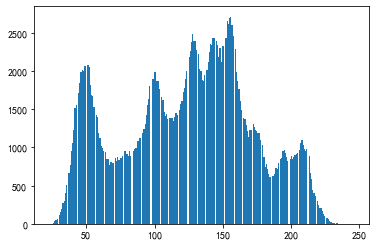

In [48]:
plt.hist(image.flatten(), bins=256); #直方图

#### LBP

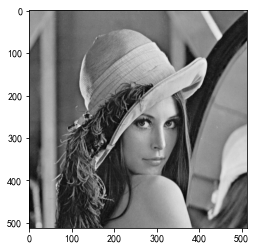

In [49]:
from skimage.feature import local_binary_pattern
image = cv2.imread('lena.jpg', 0)   #灰度图片
plt.imshow(image, plt.cm.gray);

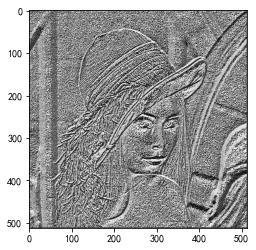

In [50]:
radius = 1 # LBP算法中范围半径的取值
n_points = 8 * radius # 领域像素点数
lbp = local_binary_pattern(image, n_points, radius)
plt.imshow(lbp, plt.cm.gray);

In [51]:
import cv2
face_patterns = cv2.CascadeClassifier("lbpface.xml")  #LBP+Adaboost
image = cv2.imread('lena.jpg')
# 获取识别到的人脸
faces = face_patterns.detectMultiScale(image, scaleFactor=1.1, minNeighbors=4, minSize=(40, 40))
# 将识别到的人脸框出来
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2.imshow("img",image)
cv2.waitKey(0)

-1

#### HAAR

In [53]:
face_patterns = cv2.CascadeClassifier("haarface.xml")  #HAAR+Adaboost
image = cv2.imread('lena.jpg')
faces = face_patterns.detectMultiScale(image, scaleFactor=1.1, minNeighbors=4, minSize=(40, 40))
# 将识别到的人脸框出来
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow("img",image)
cv2.waitKey(0)

-1

#### HOG

In [55]:
#利用Hog特征和SVM分类器进行行人检测

img = cv2.imread('hog.jpg')
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


(rects,weight) = hog.detectMultiScale(img,
                                      winStride=(2,4),
                                      padding=(8,8),
                                      scale=1.8,
                                      useMeanshiftGrouping=False)
for (x,y,w,h) in rects:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

cv2.imshow("hog-detector",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
